# iLykei Lecture Series

# Machine Learning

# Introduction to Deep Learning

# Project: MNIST by Simple Deep NN


## Yuri Balasanov, &copy; iLykei 2018

##### Main source: [Keras Documentation](https://github.com/keras-team/keras/tree/master/examples)

This notebook shows how to train a simple deep NN on the MNIST dataset.

In [123]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import imageio

# Deep network solution

This example of deep network architecture for MNIST data is based on Keras documentation.

Set main parameters.

In [124]:
batch_size = 128
num_classes = 10
epochs = 20

Load the data, create train and test samples.

In [125]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Shape x_train: ',x_train.shape)

Shape x_train:  (60000, 28, 28)


In [126]:
y_train[:6]

array([5, 0, 4, 1, 9, 2], dtype=uint8)

Look at the first image.

Shape:  (28, 28)
Raw:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]]
First label:  5


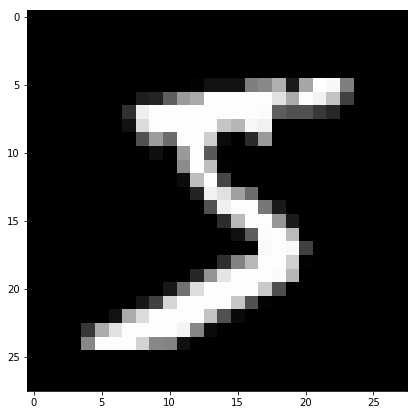

In [127]:
first_image = x_train[0]
print('Shape: ',first_image.shape)
print('Raw: ',first_image[:6,])
first_image = np.array(first_image, dtype='float')
print('First label: ',y_train[0])

plt.imshow(first_image, cmap='gray')
plt.show()

Flatten and normalize the train and test samples images

In [128]:
x_train = x_train.reshape(60000, 784) # each image as vector 784=28*28
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


Convert class vectors to binary class matrices.

In [129]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('Row size of y_train: ',y_train[0].shape)
print('y_train: \n',y_train[:6])
print('y_test: \n',y_test[:6])

Row size of y_train:  (10,)
y_train: 
 [[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]]
y_test: 
 [[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


<font color=blue>

**Assignment 1**

Create model with two hidden layers of 196 units with relu activation function, followed by 0.2 dropouts. Output has 10 units (`num_classes`) with softmax activation.
Print model summary:

_________________________________________________________________ <br>
Layer (type)                 Output Shape              Param #    <br>
================================================================= <br>
dense_1 (Dense)              (None, 196)               153860     <br>
_________________________________________________________________ <br>
dropout_1 (Dropout)          (None, 196)               0          <br>
_________________________________________________________________ <br>
dense_2 (Dense)              (None, 196)               38612      <br>
_________________________________________________________________ <br>
dropout_2 (Dropout)          (None, 196)               0          <br>
_________________________________________________________________ <br>
dense_3 (Dense)              (None, 10)                1970       <br>
================================================================= <br>
Total params: 194,442 <br>
Trainable params: 194,442 <br>
Non-trainable params: 0 <br>

In [130]:
# Skipped code: model and summary


Plot the model architecture.

![l3](https://ilykei.com/api/fileProxy/documents%2FAdvanced%20Data%20Mining%20and%20Predictive%20Analytics%2031009%2FLecture%20Deep%20Learning%2Fsimple_dense_mnist.png)

In [131]:
# Skipped code
# Plot architecture


Compile the model using `categorical_crossentropy` as loss and `accuracy` as metrics. Try optimizers `RMSprop()` or `Adam`.
Read [one of available sources](http://ruder.io/optimizing-gradient-descent/index.html#gradientdescentoptimizationalgorithms) for more information about optimizers and their comparisons.


Visualize initial weights of the first layer: it contains 196 units, each unit has $784=28 \times 28$ inputs. So, each of 196 vectors of weights has 784 components and can be interpreted as image of size $28 \times 28$. 

Reshaping these vectors into 196 arrays of shape (28,28) allows vizualizing the weights as (28,28) images in which intensity of a pixel corresponds to the size of weight.

Show 25 weights vectors.

Initial weights are random.

<font color=blue>

Fit the model: 

* Inputs `x_train` and labels `y_train`
* Call fitted model object `history`
* Use parameters' values defined earlier:

`batch_size = 128` <br>
`epochs = 20` <br>

* Define `validation_data` = (x_test,y_test)

In [132]:
# Skipped code
# 

Show keys of variables saved in `history`. Plot accuracy and validation accuracy.

Validate the model.

Check estimated weights and their shapes.

Visualize weights of the first layer and compare them with the initial weights.

w = model.layers[0].get_weights()[0]

R, C = 5, 5  # rows, columns
plt.figure(figsize=(R, C))
for i in range(R*C):
    plt.subplot(R, C, i + 1)
    plt.imshow(w[:,i].reshape((28, 28)), cmap='Greys', interpolation='nearest')
    plt.axis('off')

# Shallow network solution

<font color=blue>

**Assignment 2**

Modify the model to `model1` with only 1 hidden layer with 100 units and `relu` activation. Print summary of the model.

![l1](https://ilykei.com/api/fileProxy/documents%2FAdvanced%20Data%20Mining%20and%20Predictive%20Analytics%2031009%2FLecture%20Deep%20Learning%2Fsimple_dense_mnist1.png)

In [133]:
# Skipped code


mpl.rcParams['figure.figsize'] = (7,7)  # plot sizes

plot_model(model1, to_file='simple_dense_mnist1.png', show_shapes=True)
plt.imshow(imageio.imread('simple_dense_mnist1.png'))

<font color=blue>

* Compile the model
* Fit it
* Evaluate it.

In [134]:
# Skipped code
# Compile the model


In [135]:
# Skipped code
# Fit the model


print(history1.history.keys())
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.ylim((0.8,1))
plt.show()

Visualize the trained weigths again.

Check how the first 5 numbers from the test sample are predicted. 

print('Actual: \n',y_test[:5],'\n ')
print('Predicted: \n',np.around(np.array(model1.predict(x_test)[:5]), decimals=2))

Try to reduce number of units in the single hidden layer to make it less overfitting.